C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


<Figure size 432x288 with 0 Axes>

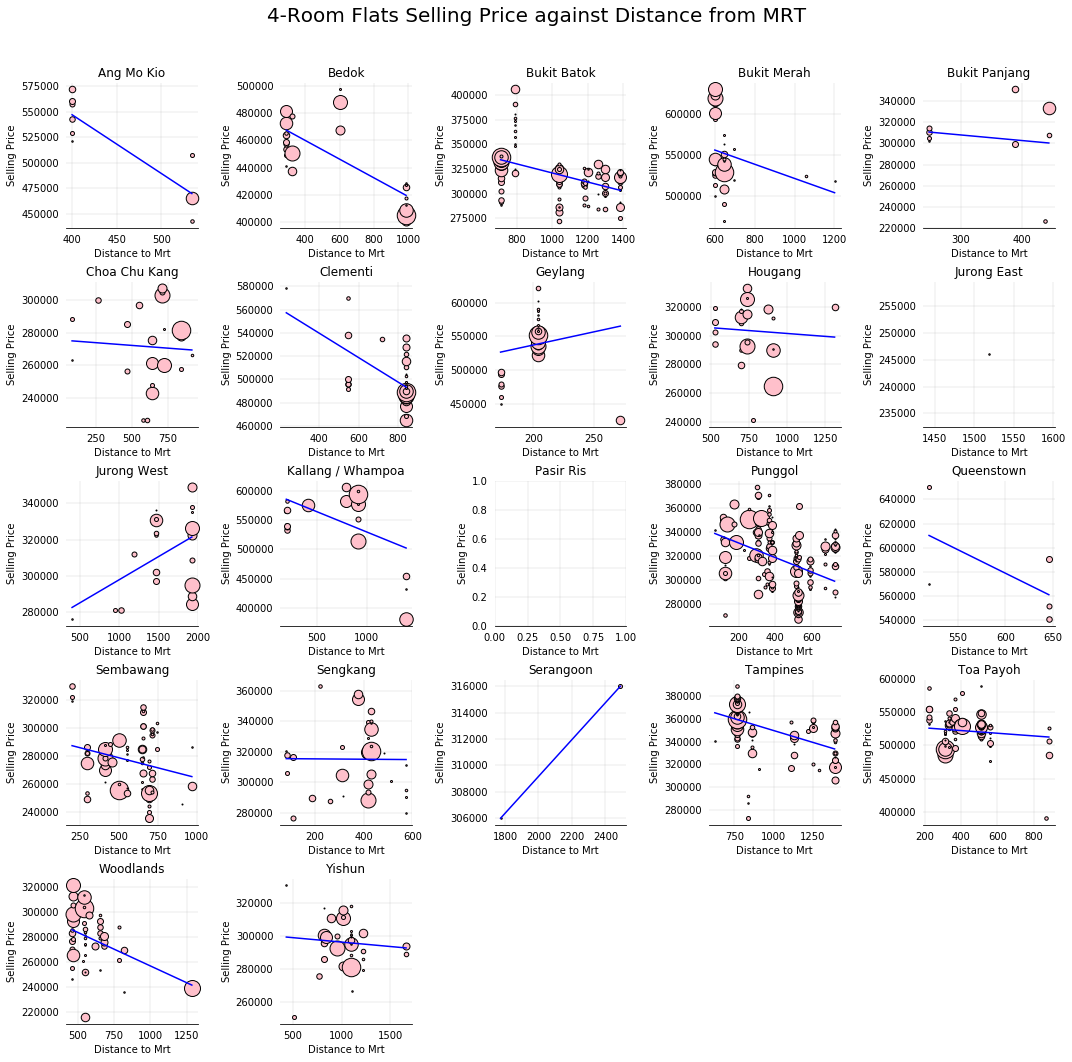

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os


os.getcwd()
# bubble plot 4-Rooms flats available for Nov 2018 Sale of balance flats

unitDetails = np.genfromtxt("Merged_unitsDetails_DistToMrt.csv", delimiter=",",skip_header=1,
                dtype=[('town','U24'),('rmType','U7'),('blk','U6'),('unitNum','U10'),
                      ('level','i4'),('sqm','i8'),
                      ('sellingPrice','i8'),('color','U12') ,('repurchasedFlat','U30'),('leaseLessThan60Yrs','U10'),
                      ('street','U30'),('probableCompletionDate','U10'),('deliveryPossessionDate','U30'),
                      ('leaseCommencementDate','U15'),('availableEthnicQuotaMl','U20'),
                      ('availableEthnicQuotaCh','U25'),('availableEthnicQuotaIn','U20'),('lastUpdate','U60'),
                      ('NearestMrt','U30'),('DistToMrt','f8'),('blkX','i8'),('blkY','i8')],
                missing_values=['na','-',''],filling_values=0, comments='!')

labels = ['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun']
# defining names
DistToMrt= unitDetails['DistToMrt']
town = unitDetails['town']
rmType= unitDetails['rmType']
sellingPrice=unitDetails['sellingPrice']
floorlevel = unitDetails['level']
#print(town)
#print(DistToMrt)
townToMrt= zip(town,DistToMrt)
townToMrt =set(townToMrt)


##############################################

# Gathering data for town, distance and price
distPrice=list(zip(town,rmType,DistToMrt,sellingPrice))
#print('distPrice', distPrice)
#distPrice=set(distPrice)
fig = plt.gcf()
for town in labels: 
    dist_town=[]
    price_town = []
    for name in distPrice:
        if name[0]== town and name[1]=='4-Room':
            dist_town.append(name[2])  # not that townToMrt is not a array
            price_town.append(name[3])
    #print("dist_{}= ({},{}) ".format(town,dist_town,price_town))
    
    # filter out towns that dont meet search criteria
    # to sort by dist
    if len(dist_town) > 0:
        tmp = list(zip(dist_town, price_town)) # zip dist and price together, so when sorting, they stay together
        tmp.sort() 
        tmpArray = np.array(tmp)
    
        dist_town_sorted = tmpArray[:,0]
        price_town_sorted = tmpArray[:,1]
    


# make subplots from my above plots
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=False, sharey=False, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist] 

for town in labels: 
    dist_town=[]
    price_town = []
    for name in distPrice:
        if name[0]== town and name[1]=='4-Room':
            dist_town.append(name[2])  # not that townToMrt is not a array
            price_town.append(name[3])
    #print("dist_{}= ({},{}) ".format(town,dist_town,price_town))
    
    # filter out towns that dont meet search criteria
    # to sort by dist
    dist_town_sorted = []
    price_town_sorted = []

    if len(dist_town) > 0:
        tmp = list(zip(dist_town, price_town)) # zip dist and price together, so when sorting, they stay together
        tmp.sort() 
        tmpArray = np.array(tmp)
    
        dist_town_sorted = tmpArray[:,0]
        price_town_sorted = tmpArray[:,1]
        
        
    # trying to generate correlation coeffient for each subgraph   
    np.random.seed(1)
    x = dist_town_sorted
    y = price_town_sorted
    coeff = np.corrcoef(x, y)
    #print("Correlation coefficient for {} : {}".format(town, coeff[0,1]))
    
    # Marker for floor level
    ax = axes_list.pop(0)
    marker = list(zip(dist_town_sorted, price_town_sorted, floorlevel))
    # plot per graph per marker(point)
    for dist,price,unitLevel in marker:
        ax.plot(dist,price,".",clip_on=False, markersize=unitLevel, markeredgewidth=1.0,markeredgecolor=(0, 0, 0, 1),color="pink")
        
    
    #ax.plot(dist_town_sorted, price_town_sorted ,'.',clip_on=False)
    #ax.plot([0,1,2] )
    ax.set_title(town)
    ax.tick_params(
        which='both',
        bottom=False,
        left=False,
        right=False,
        top=False
    )
    ax.grid(linewidth=0.25)
    #ax.set_xlim((1950, 2020))
    #ax.set_xticks(range(0,2800, 1000))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(linewidth=0.25)
    #ax.set_xlim((0,3000))
    ax.set_xlabel("Distance to Mrt")
    ax.set_ylabel("Selling Price")
    fig.suptitle('4-Room Flats Selling Price against Distance from MRT',fontsize =20)
    
    # Best fit line
    x = dist_town_sorted
    y = price_town_sorted 
    def best_fit_slope_and_intercept(x,y):
        m = (((np.mean(x)*np.mean(y)) - np.mean(x*y)) /
             ((np.mean(x)*np.mean(x)) - np.mean(x*x)))
        b = np.mean(y) - m*np.mean(x)

        return m, b

    if len(x) > 1 :
        m, b = best_fit_slope_and_intercept(x,y)
        regression_line = [(m*x_bar)+b for x_bar in x]
        #style.use('ggplot')
        ax.plot(x, regression_line, color='blue') # specific to each subplot
    
for ax in axes_list:
        ax.remove()
    #ax.spines['left'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)

plt.tight_layout()  
fig.subplots_adjust(top=0.91)
plt.show()    
print()
    
        



C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:111: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsa

<Figure size 432x288 with 0 Axes>

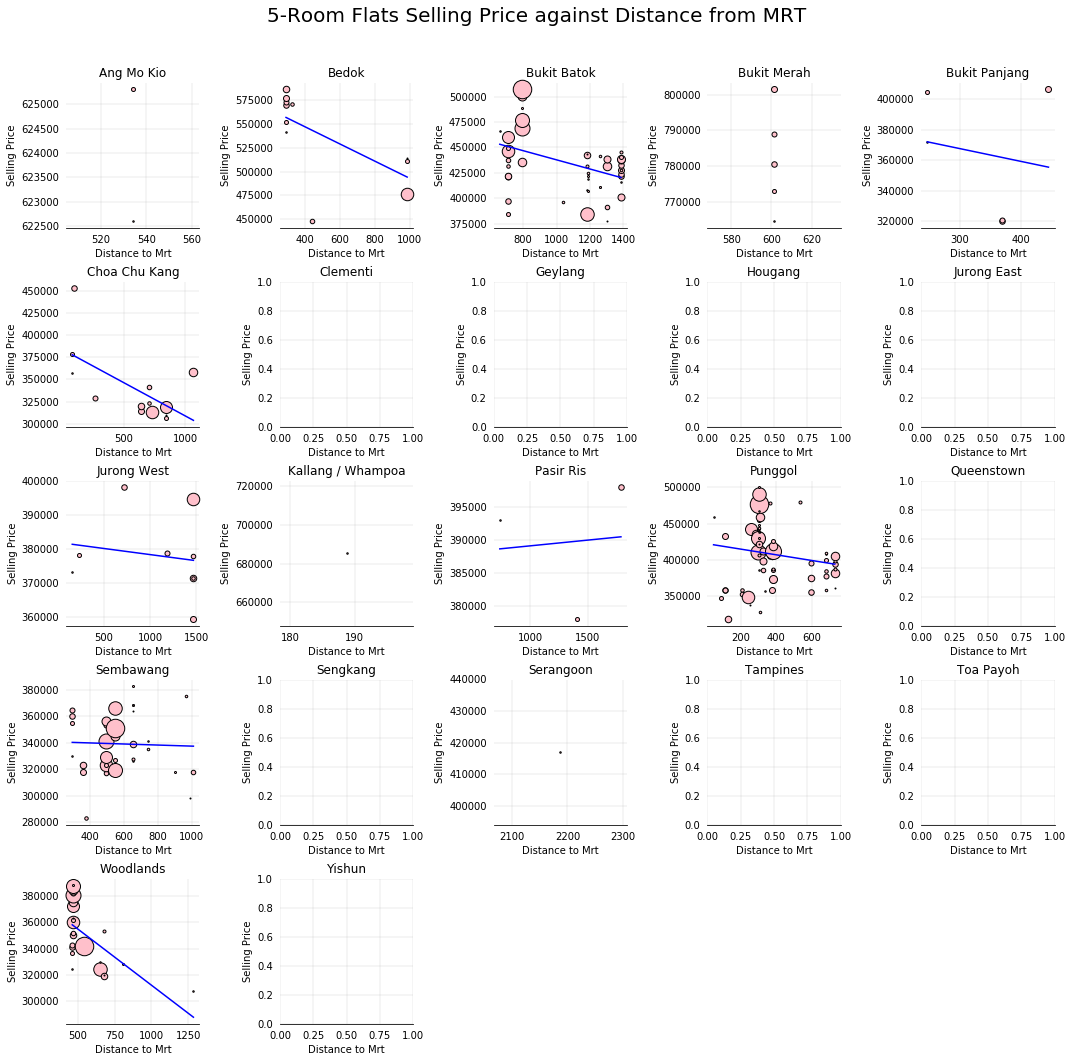

In [7]:
# Bubbleplot of 5-Rooms flats available for Nov 2018 Sale of balance flats
%matplotlib inline 
DistToMrt= unitDetails['DistToMrt']
town = unitDetails['town']
rmType= unitDetails['rmType']
sellingPrice=unitDetails['sellingPrice']
floorlevel = unitDetails['level']
#print(town)
#print(DistToMrt)
townToMrt= zip(town,DistToMrt)
townToMrt =set(townToMrt)


##############################################

# Gathering data for town, distance and price
distPrice=list(zip(town,rmType,DistToMrt,sellingPrice))
#print('distPrice', distPrice)
#distPrice=set(distPrice)
fig = plt.gcf()
for town in labels: 
    dist_town=[]
    price_town = []
    for name in distPrice:
        if name[0]== town and name[1]=='5-Room':
            dist_town.append(name[2])  # not that townToMrt is not a array
            price_town.append(name[3])
    #print("dist_{}= ({},{}) ".format(town,dist_town,price_town))
    
    # filter out towns that dont meet search criteria
    # to sort by dist
    if len(dist_town) > 0:
        tmp = list(zip(dist_town, price_town)) # zip dist and price together, so when sorting, they stay together
        tmp.sort() 
        tmpArray = np.array(tmp)
    
        dist_town_sorted = tmpArray[:,0]
        price_town_sorted = tmpArray[:,1]


# make subplots from my above plots
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=False, sharey=False, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist] 

for town in labels: 
    dist_town=[]
    price_town = []
    for name in distPrice:
        if name[0]== town and name[1]=='5-Room':
            dist_town.append(name[2])  # not that townToMrt is not a array
            price_town.append(name[3])
    #print("dist_{}= ({},{}) ".format(town,dist_town,price_town))
    
    # filter out towns that dont meet search criteria
    # to sort by dist
    dist_town_sorted = []
    price_town_sorted = []

    if len(dist_town) > 0:
        tmp = list(zip(dist_town, price_town)) # zip dist and price together, so when sorting, they stay together
        tmp.sort() 
        tmpArray = np.array(tmp)
    
        dist_town_sorted = tmpArray[:,0]
        price_town_sorted = tmpArray[:,1]
        
        
    # trying to generate correlation coeffient for each subgraph   
    np.random.seed(1)
    x = dist_town_sorted
    y = price_town_sorted
    coeff = np.corrcoef(x, y)
    #print("Correlation coefficient for {} : {}".format(town, coeff[0,1]))
    
    # Marker for floor level
    ax = axes_list.pop(0)
    marker = list(zip(dist_town_sorted, price_town_sorted, floorlevel))
    # plot per graph per marker(point)
    for dist,price,unitLevel in marker:
        ax.plot(dist,price,".",clip_on=False, markersize=unitLevel, markeredgewidth=1.0,markeredgecolor=(0, 0, 0, 1),color="pink")
        
    
    #ax.plot(dist_town_sorted, price_town_sorted ,'.',clip_on=False)
    #ax.plot([0,1,2] )
    ax.set_title(town)
    ax.tick_params(
        which='both',
        bottom=False,
        left=False,
        right=False,
        top=False
    )
    ax.grid(linewidth=0.25)
    #ax.set_xlim((1950, 2020))
    #ax.set_xticks(range(0,2800, 1000))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(linewidth=0.25)
    #ax.set_xlim((0,3000))
    ax.set_xlabel("Distance to Mrt")
    ax.set_ylabel("Selling Price")
    fig.suptitle('5-Room Flats Selling Price against Distance from MRT',fontsize=20)
    
    # Best fit line
    x = dist_town_sorted
    y = price_town_sorted 
    def best_fit_slope_and_intercept(x,y):
        m = (((np.mean(x)*np.mean(y)) - np.mean(x*y)) /
             ((np.mean(x)*np.mean(x)) - np.mean(x*x)))
        b = np.mean(y) - m*np.mean(x)

        return m, b

    if len(x) > 1 :
        m, b = best_fit_slope_and_intercept(x,y)
        regression_line = [(m*x_bar)+b for x_bar in x]
        #style.use('ggplot')
        ax.plot(x, regression_line, color='blue') # specific to each subplot
    
for ax in axes_list:
        ax.remove()

plt.tight_layout()  
fig.subplots_adjust(top=0.91)
plt.show()    
print()
